In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

# Especifique o caminho para a planilha
caminho_planilha = '/content/drive/My Drive/PROJETO_IA_SAUDEMENTAL/Estagio001_Original.xls'
caminho_saida = '/content/drive/My Drive/PROJETO_IA_SAUDEMENTAL/Dataset251_filtrado.xlsx'  # Alterado para .xlsx

# Verificar se o arquivo existe
if os.path.exists(caminho_planilha):
    # Carregar a planilha usando o Pandas
    df_original = pd.read_excel(caminho_planilha, engine='xlrd')  # Usar o engine 'xlrd' para arquivos .xls

    # Remover linhas DIFERENTES DE 'Unclassified'
    df = df_original[df_original['status'] == 'Unclassified']

    # Exibir a quantidade de linhas restantes no DataFrame
    quantidade_linhas = df.shape[0]
    print(f'Quantidade de linhas restantes: {quantidade_linhas}')

    # Salvar o DataFrame filtrado em um novo arquivo Excel
    df.to_excel(caminho_saida, index=False, engine='openpyxl')  # Especificar o engine 'openpyxl' para salvar como .xlsx
    print(f"Planilha filtrada salva em: {caminho_saida}")

    # Reabrir o arquivo filtrado e contar as linhas
    df_filtrado = pd.read_excel(caminho_saida, engine='openpyxl')  # Usar o engine 'openpyxl' para arquivos .xlsx
    quantidade_linhas_filtrado = df_filtrado.shape[0]
    print(f'Quantidade de linhas no arquivo filtrado: {quantidade_linhas_filtrado}')
else:
    print("O arquivo não foi encontrado. Verifique o caminho e o nome do arquivo.")


Quantidade de linhas restantes: 2105
Planilha filtrada salva em: /content/drive/My Drive/PROJETO_IA_SAUDEMENTAL/Dataset251_filtrado.xlsx
Quantidade de linhas no arquivo filtrado: 2105


In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.7/336.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
#https://platform.openai.com/account/billing/overview
#https://www.youtube.com/watch?v=ULCtwZeR_SI
#https://pub.towardsai.net/how-to-use-chatgpt-api-for-direct-interaction-from-colab-or-databricks-39969a0ead5f
from openai import OpenAI

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key="xxx",
)

In [ ]:
import pandas as pd
import os

# Função para obter a conclusão para um determinado texto
def get_completion(text):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": text},
        ]
    )
    return response.choices[0].message

# Caminho para a planilha filtrada
caminho_planilha_filtrada = '/content/drive/My Drive/PROJETO_IA_SAUDEMENTAL/Dataset251_filtrado.xlsx'

# Verificar se o arquivo existe
if os.path.exists(caminho_planilha_filtrada):
    # Carregar a planilha filtrada usando o Pandas
    df = pd.read_excel(caminho_planilha_filtrada, engine='openpyxl')  # Usar o engine 'openpyxl' para arquivos .xlsx

    # Iterar por cada linha do dataframe
    for index, row in df.iterrows():
        abstract = row['abstract']
        journal = row['journal']
        # Verificar se o resumo não é NaN
        if pd.notna(abstract):
            # Perguntar sobre saúde mental
            question1 = f"Which terms directly related to mental health are mentioned in {abstract}? The words must be identical to the way they were found in {abstract}. Separate words with semicolons. Write NO if you don't find words related to mental health"
            response1 = get_completion(question1)
            # Extrair apenas as palavras separadas por ponto e vírgula
            response_content1 = response1.content
            # Dividir o conteúdo por caracteres de nova linha e remover espaços em branco
            words1 = [word.strip() for word in response_content1.split('\n')]
            # Juntar as palavras usando ponto e vírgula
            response_str1 = ';'.join(words1)
            # Armazenar a resposta na coluna 'P1'
            df.at[index, 'P1'] = response_str1
            # Imprimir a resposta de 'P1'
            print(f'Resposta P1 para a linha {index}: {response_str1}')

            # Perguntar sobre técnicas de IA
            question2 = f"What terms directly related to machine learning techniques appear in {abstract}? .The words must be identical to the way they were found in {abstract}. Separate words with semicolons.  Write NO if you don't find words related to machine learning techniques."
            response2 = get_completion(question2)
            # Extrair apenas as palavras separadas por ponto e vírgula
            response_content2 = response2.content
            # Dividir o conteúdo por caracteres de nova linha e remover espaços em branco
            words2 = [word.strip() for word in response_content2.split('\n')]
            # Juntar as palavras usando ponto e vírgula
            response_str2 = ';'.join(words2)
            # Armazenar a resposta na coluna 'P2'
            df.at[index, 'P2'] = response_str2
            # Imprimir a resposta de 'P2'
            print(f'Resposta P2 para a linha {index}: {response_str2}')

        # Atualizar a cada 10 linhas
        if index % 10 == 0:
            # Salvar o dataframe atualizado na mesma planilha
            df.to_excel(caminho_planilha_filtrada, index=False, engine='openpyxl')
            print(f'DataFrame salvo na iteração {index}')

    # Salvar a planilha final
    df.to_excel(caminho_planilha_filtrada, index=False, engine='openpyxl')
    print(f"DataFrame final salvo em: {caminho_planilha_filtrada}")
else:
    print("O arquivo não foi encontrado. Verifique o caminho e o nome do arquivo.")


Resposta P1 para a linha 0: depression; disability; severity; mental health; physical health; classifier; pre-processing; outliers; feature selection; dataset; global burden of disease; machine learning; f1-score
Resposta P2 para a linha 0: Random Forest; Logistic Regression; Bagging Classifier; Naive Bayes; Step-Forward Feature Selection; Mean Absolute Error; f1-score; Weighted voting ensemble model
DataFrame salvo na iteração 0
Resposta P1 para a linha 1: depression; anxiety; stress; hate speech; cyberbullying; NO
Resposta P2 para a linha 1: machine learning; model; datasets; patterns; indicators; depression; anxiety; stress; toxic content; hate speech; cyberbullying; flagged content; moderated; removed; detection; mental health issues; online toxicity; training; labeled text; real-time; promoting mental wellbeing; positive online environment
Resposta P1 para a linha 2: depression; suicidal tendencies; stress; anxiety; distress
Resposta P2 para a linha 2: NO
Resposta P1 para a linha 

In [ ]:
import pandas as pd

# Caminho do arquivo
caminho_arquivo = "/content/drive/My Drive/PROJETO_IA_SAUDEMENTAL/Dataset251_filtrado.xlsx"

# Carregar o arquivo Excel
df = pd.read_excel(caminho_arquivo)

# Filtrar linhas onde P1 ou P2 contêm exatamente 'NO', são NaN, ou onde abstract está vazio
linhas_para_remover = df[(df['P1'].str.strip().eq('NO') | df['P1'].isna()) |
                         (df['P2'].str.strip().eq('NO') | df['P2'].isna()) |
                         (df['abstract'].isna())]

# Imprimir quantidade de linhas que serão removidas
print("Quantidade de linhas que serão removidas:")
print(f"Quantidade de linhas: {len(linhas_para_remover)}")

# Remover essas linhas do DataFrame
df_filtrado = df.drop(linhas_para_remover.index)

# Salvar o DataFrame atualizado de volta no arquivo Excel
df_filtrado.to_excel(caminho_arquivo, index=False)

print("Linhas removidas e arquivo atualizado salvo.")


In [ ]:
#termos mais populares
import pandas as pd

# Carregar apenas as primeiras 10 linhas do arquivo Excel
caminho_arquivo = "/content/drive/My Drive/PROJETO_IA_SAUDEMENTAL/Dataset251_filtrado.xlsx"
df = pd.read_excel(caminho_arquivo, nrows=2105)

# Converter todas as entradas para strings
df = df.astype(str)

# Criar uma lista para armazenar as palavras de P1 e P2
palavras_p1 = []
palavras_p2 = []

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # Dividir as palavras de P1 e P2 usando o ponto e vírgula como separador
    palavras_p1.extend(row['P1'].split(';'))
    palavras_p2.extend(row['P2'].split(';'))

# Limpar as palavras (remover espaços em branco extras e converter para maiúsculas)
palavras_p1 = [palavra.strip().upper() for palavra in palavras_p1]
palavras_p2 = [palavra.strip().upper() for palavra in palavras_p2]

# Tratar variações das palavras como a mesma palavra
palavras_tratadas_p1 = [palavra.strip('.').strip() for palavra in palavras_p1 if palavra.strip('.').strip()]
palavras_tratadas_p2 = [palavra.strip('.').strip() for palavra in palavras_p2 if palavra.strip('.').strip()]

# Contar a frequência de cada palavra em P1 e P2
frequencia_palavras_p1 = pd.Series(palavras_tratadas_p1).value_counts()
frequencia_palavras_p2 = pd.Series(palavras_tratadas_p2).value_counts()

# Exibir as 30 primeiras palavras e suas frequências para P1
print("As 50 primeiras palavras e suas frequências na coluna P1:")
print(frequencia_palavras_p1.head(50))

# Exibir as 30 primeiras palavras e suas frequências para P2
print("\nAs 50 primeiras palavras e suas frequências na coluna P2:")
print(frequencia_palavras_p2.head(50))

As 50 primeiras palavras e suas frequências na coluna P1:
DEPRESSION                     1098
STRESS                          685
ANXIETY                         510
SUICIDE                         145
MENTAL HEALTH                   105
SADNESS                         100
FEAR                             98
SCHIZOPHRENIA                    48
HAPPINESS                        46
LONELINESS                       38
BIPOLAR DISORDER                 35
MENTAL DISORDERS                 14
WELL-BEING                       13
DISORDERS                        10
EMOTIONS                          9
THERAPY                           9
MENTAL ILLNESS                    8
MOOD                              8
DISORDER                          7
EMOTIONAL WELL-BEING              7
EMOTION                           7
MENTAL                            7
EMOTIONAL                         6
ARTIFICIAL INTELLIGENCE           5
SENTIMENT ANALYSIS                5
STIGMA                            5
COUNSE

In [4]:
#CONFERIR SE TERMOS REALMENTE ESTAO NO RESUMO E PADRONIZANDO
import pandas as pd

# Caminho do arquivo
caminho_arquivo = "/content/drive/My Drive/PROJETO_IA_SAUDEMENTAL/Dataset251_filtrado.xlsx"

# Carregar o arquivo Excel
df = pd.read_excel(caminho_arquivo)

# Definir os termos de saúde mental para a coluna P1
termos_saude_mental = [
    'DEPRESSION', 'STRESS', 'ANXIETY', 'SUICIDE', 'SADNESS',
    'FEAR', 'SCHIZOPHRENIA', 'LONELINESS', 'BIPOLAR DISORDER', 'HAPPINESS'
]

# Definir sinônimos para a coluna P2
termos_synonyms = {
    'RANDOM FOREST': ['RANDOM FOREST', 'RANDOM FOREST (RF)'],
    'SUPPORT VECTOR MACHINE': ['SUPPORT VECTOR MACHINE (SVM)', 'SUPPORT VECTOR MACHINE', 'SVM'],
    'NLP': ['NLP', 'NATURAL LANGUAGE PROCESSING', 'NATURAL LANGUAGE PROCESSING (NLP)'],
    'BERT': ['BERT'],
    'LOGISTIC REGRESSION': ['LOGISTIC REGRESSION'],
    'DECISION TREE': ['DECISION TREE', 'DECISION TREES'],
    'CONVOLUTIONAL NEURAL NETWORK': ['CONVOLUTIONAL NEURAL NETWORK (CNN)', 'CONVOLUTIONAL NEURAL NETWORK', 'CNN'],
    'XGBOOST': ['EXTREME GRADIENT BOOSTING', 'XGBOOST'],
    'LONG SHORT-TERM MEMORY': ['LONG SHORT-TERM MEMORY', 'LONG SHORT TERM MEMORY', 'LSTM'],
    'NEIGHBOR': ['K-NEAREST NEIGHBOR', 'k-Nearest Neighbor', 'k-Nearest Neighbors', 'KNN'],
    'ADABOOST': ['ADABOOST'],
    'KNN': ['K-NEAREST NEIGHBOR', 'KNN']
}

# Função para encontrar termos na coluna 'abstract'
def encontrar_termos(texto, termos, original):
    if pd.isna(texto):
        return original
    texto = texto.upper()
    encontrados = [termo for termo in termos if termo in texto]
    return '; '.join(encontrados) if encontrados else original

# Função para encontrar termos baseados em sinônimos
def encontrar_termos_synonyms(texto, termos, original):
    if pd.isna(texto):
        return original
    texto = texto.upper()
    encontrados = [termo for termo, sinonimos in termos.items() if any(sin in texto for sin in sinonimos)]
    return '; '.join(encontrados) if encontrados else original

# Aplicar a função para criar ou atualizar a coluna 'P1' e 'P2'
df['P1'] = df.apply(lambda row: encontrar_termos(row['abstract'], termos_saude_mental, row.get('P1', '')), axis=1)
df['P2'] = df.apply(lambda row: encontrar_termos_synonyms(row['abstract'], termos_synonyms, row.get('P2', '')), axis=1)

# Salvar o DataFrame atualizado de volta no arquivo Excel
df.to_excel(caminho_arquivo, index=False)

print("Colunas P1 e P2 atualizadas e arquivo salvo.")


Colunas P1 e P2 atualizadas e arquivo salvo.


In [5]:
import pandas as pd

# Carregar o arquivo Excel
file_path = '/content/drive/My Drive/PROJETO_IA_SAUDEMENTAL/Dataset251_filtrado.xlsx'
df = pd.read_excel(file_path)

# Definir as palavras-chave
palavras_chave = ['DEPRESSION', 'STRESS', 'ANXIETY', 'SUICIDE', 'SADNESS', 'FEAR', 'SCHIZOPHRENIA', 'LONELINESS', 'BIPOLAR DISORDER', 'HAPPINESS']

# Função para encontrar e formatar palavras-chave
def encontrar_palavras_chave(texto):
    if pd.isna(texto):
        return ''
    texto = texto.upper()
    encontrados = [palavra for palavra in palavras_chave if palavra in texto]
    return '; '.join(encontrados)

# Criar a coluna 'P1' com as palavras-chave encontradas
df['P1'] = df['abstract'].apply(encontrar_palavras_chave)

# Contar as ocorrências de cada palavra-chave em 'P1'
contagem_palavras = {palavra: 0 for palavra in palavras_chave}

for p1 in df['P1'].dropna():
    palavras_encontradas = p1.split('; ')
    for palavra in palavras_encontradas:
        palavra = palavra.strip()  # Remover espaços em branco adicionais
        if palavra in contagem_palavras:
            contagem_palavras[palavra] += 1

# Imprimir a contagem de cada palavra-chave
print("Contagem de palavras-chave:")
for palavra, contagem in contagem_palavras.items():
    print(f'{palavra}: {contagem}')

# Contar quantas linhas contêm pelo menos uma palavra-chave
linhas_com_palavra_chave = df['P1'].apply(lambda x: len(x.split('; ')) > 0).sum()




Contagem de palavras-chave:
DEPRESSION: 1096
STRESS: 683
ANXIETY: 508
SUICIDE: 145
SADNESS: 100
FEAR: 98
SCHIZOPHRENIA: 47
LONELINESS: 37
BIPOLAR DISORDER: 34
HAPPINESS: 46


In [ ]:
#termos selecionados IA
import pandas as pd

# Carregar o arquivo Excel
file_path = '/content/drive/My Drive/PROJETO_IA_SAUDEMENTAL/Dataset251_filtrado.xlsx'
df = pd.read_excel(file_path)

# Definir sinônimos para a coluna P2
termos_synonyms = {
    'RANDOM FOREST': ['RANDOM FOREST', 'RANDOM FOREST (RF)'],
    'SUPPORT VECTOR MACHINE': ['SUPPORT VECTOR MACHINE (SVM)', 'SUPPORT VECTOR MACHINE', 'SVM'],
    'NLP': ['NLP', 'NATURAL LANGUAGE PROCESSING', 'NATURAL LANGUAGE PROCESSING (NLP)'],
    'BERT': ['BERT'],
    'LOGISTIC REGRESSION': ['LOGISTIC REGRESSION'],
    'DECISION TREE': ['DECISION TREE', 'DECISION TREES'],
    'CONVOLUTIONAL NEURAL NETWORK': ['CONVOLUTIONAL NEURAL NETWORK (CNN)', 'CONVOLUTIONAL NEURAL NETWORK', 'CNN'],
    'XGBOOST': ['EXTREME GRADIENT BOOSTING', 'XGBOOST'],
    'LONG SHORT-TERM MEMORY': ['LONG SHORT-TERM MEMORY', 'LONG SHORT TERM MEMORY', 'LSTM'],
    'kNN': ['K-NEAREST NEIGHBOR', 'k-Nearest Neighbor', 'k-Nearest Neighbors', 'KNN'],
    'ADABOOST': ['ADABOOST'],

}

# Função para encontrar e formatar termos baseados em sinônimos
def encontrar_termos_synonyms(texto, termos):
    if pd.isna(texto):
        return ''
    texto = texto.upper()
    encontrados = [termo for termo, sinonimos in termos.items() if any(sin in texto for sin in sinonimos)]
    return '; '.join(encontrados)

# Criar a coluna 'P2' com os termos encontrados baseados nos sinônimos
df['P2'] = df['abstract'].apply(lambda x: encontrar_termos_synonyms(x, termos_synonyms))

# Salvar o arquivo Excel atualizado
df.to_excel(file_path, index=False)

# Contar as ocorrências de cada termo em 'P2'
contagem_termos = {termo: 0 for termo in termos_synonyms}

for p2 in df['P2'].dropna():
    termos_encontrados = p2.split('; ')
    for termo in termos_encontrados:
        if termo in contagem_termos:
            contagem_termos[termo] += 1

# Imprimir a contagem de cada termo em P2
print("\nContagem de termos em P2:")
for termo, contagem in contagem_termos.items():
    print(f'{termo}: {contagem}')



Contagem de termos em P2:
RANDOM FOREST: 243
SUPPORT VECTOR MACHINE: 262
NLP: 168
BERT: 114
LOGISTIC REGRESSION: 148
DECISION TREE: 142
CONVOLUTIONAL NEURAL NETWORK: 209
XGBOOST: 61
LONG SHORT-TERM MEMORY: 173
kNN: 100
ADABOOST: 28
KNN: 100


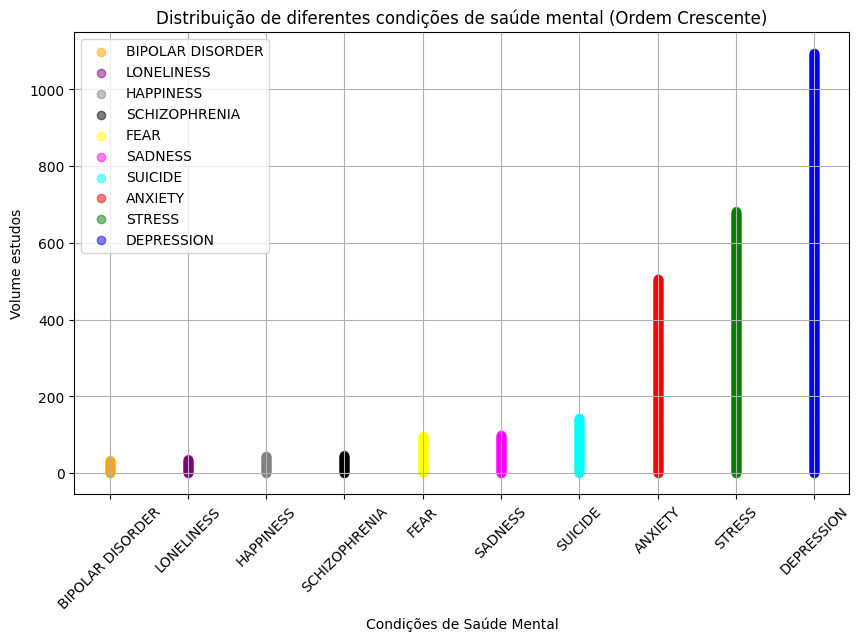

In [ ]:
import matplotlib.pyplot as plt



# Dados
labels = ['DEPRESSION', 'STRESS', 'ANXIETY', 'SUICIDE', 'SADNESS', 'FEAR', 'SCHIZOPHRENIA', 'LONELINESS', 'BIPOLAR DISORDER', 'HAPPINESS']
sizes = [1096, 683, 508, 145, 100, 98, 47, 37, 34, 46]


colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'grey']

# Ordenar os dados em ordem crescente
sorted_data = sorted(zip(labels, sizes, colors), key=lambda x: x[1])

# Separar os dados ordenados novamente
labels, sizes, colors = zip(*sorted_data)

# Plotagem do gráfico
plt.figure(figsize=(10, 6))

for label, size, color in zip(labels, sizes, colors):
    plt.scatter([label]*size, range(size), color=color, label=label, alpha=0.5)

plt.title('Distribuição de diferentes condições de saúde mental (Ordem Crescente)')
plt.xlabel('Condições de Saúde Mental')
plt.ylabel('Volume estudos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


** *texto em itálico*pAREI ATUALIZRA
**

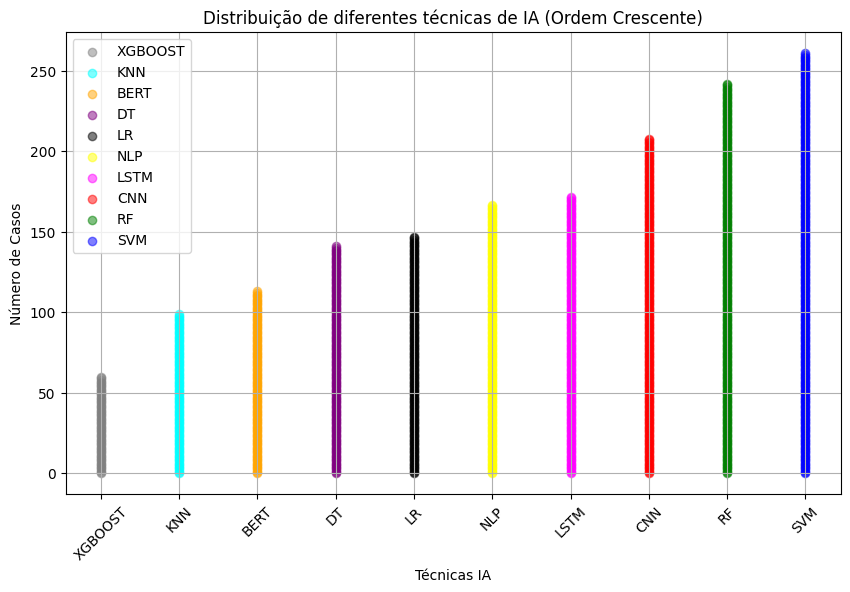

In [ ]:
import matplotlib.pyplot as plt

# Dados
labels = ['SVM', 'RF', 'CNN', 'KNN', 'LSTM', 'NLP', 'LR', 'DT', 'BERT', 'XGBOOST']
sizes = [262, 243, 209, 100, 173, 168, 148, 142, 114, 61]



colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'grey']
# Ordenar os dados em ordem crescente
sorted_data = sorted(zip(labels, sizes, colors), key=lambda x: x[1])

# Separar os dados ordenados novamente
labels, sizes, colors = zip(*sorted_data)

# Plotagem do gráfico
plt.figure(figsize=(10, 6))

for label, size, color in zip(labels, sizes, colors):
    plt.scatter([label]*size, range(size), color=color, label=label, alpha=0.5)

plt.title('Distribuição de diferentes técnicas de IA (Ordem Crescente)')
plt.xlabel('Técnicas IA')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
import pandas as pd

# Carregar o arquivo Excel
file_path = '/content/drive/My Drive/PROJETO_IA_SAUDEMENTAL/Dataset251_filtrado.xlsx'
df = pd.read_excel(file_path)

# Definir as palavras-chave
palavras_chave = ['DEPRESSION', 'STRESS', 'ANXIETY', 'SUICIDE', 'SADNESS', 'FEAR', 'SCHIZOPHRENIA', 'LONELINESS', 'BIPOLAR DISORDER', 'HAPPINESS']

# Função para encontrar e formatar palavras-chave
def encontrar_palavras_chave(texto):
    if pd.isna(texto):
        return ''
    texto = texto.upper()
    encontrados = [palavra for palavra in palavras_chave if palavra in texto]
    return '; '.join(encontrados)

# Criar a coluna 'P1' com as palavras-chave encontradas
df['P1'] = df['abstract'].apply(encontrar_palavras_chave)

# Filtrar os artigos que contêm pelo menos uma palavra-chave
df_filtrado = df[df['P1'].apply(lambda x: len(x) > 0)]

# Filtrar os anos de interesse
anos_interesse = list(range(2014, 2024 + 1))
df_anos_interesse = df_filtrado[df_filtrado['year'].isin(anos_interesse)]

# Contar a quantidade de artigos por ano
contagem_por_ano = df_anos_interesse['year'].value_counts().sort_index()

# Imprimir a contagem de artigos por ano
print("Contagem de artigos por ano:")
for ano, contagem in contagem_por_ano.items():
    print(f'{ano}: {contagem}')

# Identificar as linhas que não foram contabilizadas devido ao ano
linhas_nao_contabilizadas = df_filtrado[~df_filtrado['year'].isin(anos_interesse)]

# Imprimir as linhas não contabilizadas
print("\nLinhas que não foram contabilizadas (fora do intervalo de 2014 a 2024):")
print(linhas_nao_contabilizadas)


Contagem de artigos por ano:
2014.0: 5
2015.0: 8
2016.0: 21
2017.0: 20
2018.0: 36
2019.0: 74
2020.0: 122
2021.0: 203
2022.0: 330
2023.0: 540
2024.0: 289

Linhas que não foram contabilizadas (fora do intervalo de 2014 a 2024):
      bibtex_key                                              title  \
1797         NaN  The Psychopathology and Neuroanatomical Marker...   
1812         NaN  Personalized prediction of antidepressant v. p...   

                                                 author   journal  year  \
1797  Upthegrove, R. and Lalousis, P. and Mallikarju...  Abstract   NaN   
1812  Webb, CA and Trivedi, MH and Cohen, ZD and Dil...       NaN   NaN   

     source pages volume                                           abstract  \
1797  PuMed   NaN    NaN  Depression frequently occurs in first-episode ...   
1812  PuMed   NaN    NaN  Background: Major depressive disorder (MDD) is...   

     document_type  ... author_keywords  \
1797           NaN  ...             NaN   
1812      